Zip configuration at each temperature to get a measure of the kolmogorov complexity

In [1]:
cd ../..

/home/ben/masterphase/Mastercode


In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

import tempfile
import tarfile
import os
import glob
import re

%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (12, 8)

from Ising.Data import IsingData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
folder = 'Ising/16x16_240temp_1000each/'
d = IsingData(folder)
configs = d.train_data[0]

Loading data from precreated .npz


## First method: gzip compression

In [58]:
files = glob.glob(os.path.join(folder, "train/*"))
filesizes = np.zeros((len(files),2))
pattern = re.compile('config_([0-9.]+).dat')

for file_name, i in zip(files, range(len(files))):
    with tempfile.NamedTemporaryFile(delete=True) as f:
        with tarfile.open(f.name, "w:gz") as tar:
            tar.add(file_name, os.path.basename(file_name))
            beta = float(pattern.search(file_name).group(1))
        size = os.path.getsize(f.name)
        filesizes[i, :] = [1/beta, size]
        print("Zipping {} to {} bytes ({}/{})".format(file_name, filesizes[i, 1], i+1, len(files))) 

Zipping Ising/16x16_240temp_1000each/train/config_0.675349.dat to 14054.0 14054 bytes (1/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.684635.dat to 13390.0 13390 bytes (2/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.337051.dat to 89966.0 89966 bytes (3/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.509496.dat to 31566.0 31566 bytes (4/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.468728.dat to 44722.0 44722 bytes (5/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.451718.dat to 52229.0 52229 bytes (6/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.769253.dat to 11488.0 11488 bytes (7/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.455854.dat to 49621.0 49621 bytes (8/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.666312.dat to 14500.0 14500 bytes (9/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.694180.dat to 13225.0 13225 bytes (10/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.338196.

Zipping Ising/16x16_240temp_1000each/train/config_0.318713.dat to 92137.0 92137 bytes (88/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.397610.dat to 79967.0 79967 bytes (89/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.926748.dat to 8970.0 8970 bytes (90/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.729791.dat to 12446.0 12446 bytes (91/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.605537.dat to 18311.0 18311 bytes (92/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.657513.dat to 14765.0 14765 bytes (93/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.679961.dat to 13721.0 13721 bytes (94/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.419378.dat to 70862.0 70862 bytes (95/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.335914.dat to 90884.0 90884 bytes (96/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.288268.dat to 94205.0 94205 bytes (97/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.

Zipping Ising/16x16_240temp_1000each/train/config_0.364168.dat to 87444.0 87444 bytes (175/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.305982.dat to 93354.0 93354 bytes (176/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.307874.dat to 93193.0 93193 bytes (177/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.298641.dat to 94002.0 94002 bytes (178/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.344038.dat to 89122.0 89122 bytes (179/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.545798.dat to 25472.0 25472 bytes (180/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.328166.dat to 90685.0 90685 bytes (181/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.396029.dat to 80413.0 80413 bytes (182/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.453777.dat to 51069.0 51069 bytes (183/240)
Zipping Ising/16x16_240temp_1000each/train/config_0.447657.dat to 55081.0 55081 bytes (184/240)
Zipping Ising/16x16_240temp_1000each/tra

In [55]:
filesizes.sort(axis=0)

In [68]:
entropy = np.load('notebooks/9_entropy/entropy.npy')

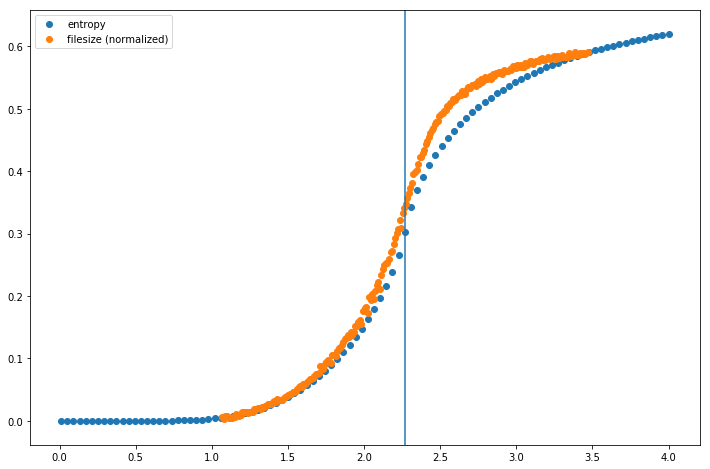

In [88]:
plt.scatter(entropy[0,:], entropy[1,:], label='entropy')
plt.scatter(filesizes[:,0], 0.65*(filesizes[:,1]-8500)/max(filesizes[:,1]), label='zipped filesize (rescaled)')
plt.axvline(2.269)
plt.legend()

With a lossless compression, high temperature states cannot be represented efficiently

## Method 2: Entropy code
calculate relative entropy via kullback-leibler divergence

In [98]:
np.shape(configs)

(480000, 256)

In [101]:
from PIL import Image, ImageFile
from io import StringIO

In [119]:
# save each configuration as jpeg, group sizes by temperature
def calc_jpeg_size(d, quality=30):
    temps = np.unique(d.train_data[2])
    sizes = []
    for t in temps:
        print("At temperature T = {}, quality = {}".format(t, quality))
        configs = np.reshape(d.train_data[0][d.train_data[2]==t, :], (-1, 16, 16))
        sizes_l = []
        for i in range(np.shape(configs)[0]):
            with tempfile.NamedTemporaryFile(delete=True) as f:
                img = Image.fromarray(np.uint8(configs[i]))
                img.save(f.name, "JPEG", quality=quality, optimize=True, progressive=True)
                sizes_l.append(os.path.getsize(f.name))
        sizes.append([np.mean(sizes_l), np.std(sizes_l)])
    return np.array(sizes)

In [120]:
qualities = [1, 10, 30, 50, 70, 90]

sizes = []
for q in qualities:
    sizes.append(calc_jpeg_size(d, q))

At temperature T = 1.0689996515061135, quality = 1
At temperature T = 1.0790419833654887, quality = 1
At temperature T = 1.0890837864829455, quality = 1
At temperature T = 1.0991257553741753, quality = 1
At temperature T = 1.109167602988985, quality = 1
At temperature T = 1.1192092115394947, quality = 1
At temperature T = 1.1292506405674259, quality = 1
At temperature T = 1.1392934329987228, quality = 1
At temperature T = 1.14933413326989, quality = 1
At temperature T = 1.1593759311237948, quality = 1
At temperature T = 1.1694183079452618, quality = 1
At temperature T = 1.1794608684370376, quality = 1
At temperature T = 1.1895019317511373, quality = 1
At temperature T = 1.1995441732141785, quality = 1
At temperature T = 1.2095862126525136, quality = 1
At temperature T = 1.2196282085369095, quality = 1
At temperature T = 1.2296689608190579, quality = 1
At temperature T = 1.2397119405334975, quality = 1
At temperature T = 1.2497531737481846, quality = 1
At temperature T = 1.2597949053894

At temperature T = 2.695781102574471, quality = 1
At temperature T = 2.7058180499710476, quality = 1
At temperature T = 2.7158636310553574, quality = 1
At temperature T = 2.725902341822702, quality = 1
At temperature T = 2.735948170197864, quality = 1
At temperature T = 2.745985369389952, quality = 1
At temperature T = 2.756028122510962, quality = 1
At temperature T = 2.7660680895320917, quality = 1
At temperature T = 2.776112110511471, quality = 1
At temperature T = 2.7861517115329963, quality = 1
At temperature T = 2.7961938209708945, quality = 1
At temperature T = 2.806237705171054, quality = 1
At temperature T = 2.8162826195934416, quality = 1
At temperature T = 2.8263198206982705, quality = 1
At temperature T = 2.8363644614878436, quality = 1
At temperature T = 2.846407833314357, quality = 1
At temperature T = 2.856449148064042, quality = 1
At temperature T = 2.8664876067408325, quality = 1
At temperature T = 2.876530673884841, quality = 1
At temperature T = 2.8865693700351005, qu

At temperature T = 1.9024716912212347, quality = 10
At temperature T = 1.9125139613519178, quality = 10
At temperature T = 1.922555614727545, quality = 10
At temperature T = 1.9325986881520107, quality = 10
At temperature T = 1.9426415651474562, quality = 10
At temperature T = 1.952682595349491, quality = 10
At temperature T = 1.9627239468023303, quality = 10
At temperature T = 1.9727640199406988, quality = 10
At temperature T = 1.982809045574866, quality = 10
At temperature T = 1.9928496554362947, quality = 10
At temperature T = 2.002892176302581, quality = 10
At temperature T = 2.0129310691884665, quality = 10
At temperature T = 2.0229728800255704, quality = 10
At temperature T = 2.033016182808815, quality = 10
At temperature T = 2.0430595224961285, quality = 10
At temperature T = 2.0531014149974953, quality = 10
At temperature T = 2.0631403471852576, quality = 10
At temperature T = 2.073183373069348, quality = 10
At temperature T = 2.083224832039998, quality = 10
At temperature T = 

At temperature T = 1.0890837864829455, quality = 30
At temperature T = 1.0991257553741753, quality = 30
At temperature T = 1.109167602988985, quality = 30
At temperature T = 1.1192092115394947, quality = 30
At temperature T = 1.1292506405674259, quality = 30
At temperature T = 1.1392934329987228, quality = 30
At temperature T = 1.14933413326989, quality = 30
At temperature T = 1.1593759311237948, quality = 30
At temperature T = 1.1694183079452618, quality = 30
At temperature T = 1.1794608684370376, quality = 30
At temperature T = 1.1895019317511373, quality = 30
At temperature T = 1.1995441732141785, quality = 30
At temperature T = 1.2095862126525136, quality = 30
At temperature T = 1.2196282085369095, quality = 30
At temperature T = 1.2296689608190579, quality = 30
At temperature T = 1.2397119405334975, quality = 30
At temperature T = 1.2497531737481846, quality = 30
At temperature T = 1.2597949053894026, quality = 30
At temperature T = 1.2698364323691467, quality = 30
At temperature 

At temperature T = 2.685738994513035, quality = 30
At temperature T = 2.695781102574471, quality = 30
At temperature T = 2.7058180499710476, quality = 30
At temperature T = 2.7158636310553574, quality = 30
At temperature T = 2.725902341822702, quality = 30
At temperature T = 2.735948170197864, quality = 30
At temperature T = 2.745985369389952, quality = 30
At temperature T = 2.756028122510962, quality = 30
At temperature T = 2.7660680895320917, quality = 30
At temperature T = 2.776112110511471, quality = 30
At temperature T = 2.7861517115329963, quality = 30
At temperature T = 2.7961938209708945, quality = 30
At temperature T = 2.806237705171054, quality = 30
At temperature T = 2.8162826195934416, quality = 30
At temperature T = 2.8263198206982705, quality = 30
At temperature T = 2.8363644614878436, quality = 30
At temperature T = 2.846407833314357, quality = 30
At temperature T = 2.856449148064042, quality = 30
At temperature T = 2.8664876067408325, quality = 30
At temperature T = 2.8

At temperature T = 1.872347118176933, quality = 50
At temperature T = 1.8823883743693997, quality = 50
At temperature T = 1.8924304673735524, quality = 50
At temperature T = 1.9024716912212347, quality = 50
At temperature T = 1.9125139613519178, quality = 50
At temperature T = 1.922555614727545, quality = 50
At temperature T = 1.9325986881520107, quality = 50
At temperature T = 1.9426415651474562, quality = 50
At temperature T = 1.952682595349491, quality = 50
At temperature T = 1.9627239468023303, quality = 50
At temperature T = 1.9727640199406988, quality = 50
At temperature T = 1.982809045574866, quality = 50
At temperature T = 1.9928496554362947, quality = 50
At temperature T = 2.002892176302581, quality = 50
At temperature T = 2.0129310691884665, quality = 50
At temperature T = 2.0229728800255704, quality = 50
At temperature T = 2.033016182808815, quality = 50
At temperature T = 2.0430595224961285, quality = 50
At temperature T = 2.0531014149974953, quality = 50
At temperature T =

At temperature T = 3.468994130461931, quality = 50
At temperature T = 1.0689996515061135, quality = 70
At temperature T = 1.0790419833654887, quality = 70
At temperature T = 1.0890837864829455, quality = 70
At temperature T = 1.0991257553741753, quality = 70
At temperature T = 1.109167602988985, quality = 70
At temperature T = 1.1192092115394947, quality = 70
At temperature T = 1.1292506405674259, quality = 70
At temperature T = 1.1392934329987228, quality = 70
At temperature T = 1.14933413326989, quality = 70
At temperature T = 1.1593759311237948, quality = 70
At temperature T = 1.1694183079452618, quality = 70
At temperature T = 1.1794608684370376, quality = 70
At temperature T = 1.1895019317511373, quality = 70
At temperature T = 1.1995441732141785, quality = 70
At temperature T = 1.2095862126525136, quality = 70
At temperature T = 1.2196282085369095, quality = 70
At temperature T = 1.2296689608190579, quality = 70
At temperature T = 1.2397119405334975, quality = 70
At temperature T

At temperature T = 2.6556122381234384, quality = 70
At temperature T = 2.665650165403593, quality = 70
At temperature T = 2.675692669939931, quality = 70
At temperature T = 2.685738994513035, quality = 70
At temperature T = 2.695781102574471, quality = 70
At temperature T = 2.7058180499710476, quality = 70
At temperature T = 2.7158636310553574, quality = 70
At temperature T = 2.725902341822702, quality = 70
At temperature T = 2.735948170197864, quality = 70
At temperature T = 2.745985369389952, quality = 70
At temperature T = 2.756028122510962, quality = 70
At temperature T = 2.7660680895320917, quality = 70
At temperature T = 2.776112110511471, quality = 70
At temperature T = 2.7861517115329963, quality = 70
At temperature T = 2.7961938209708945, quality = 70
At temperature T = 2.806237705171054, quality = 70
At temperature T = 2.8162826195934416, quality = 70
At temperature T = 2.8263198206982705, quality = 70
At temperature T = 2.8363644614878436, quality = 70
At temperature T = 2.8

At temperature T = 1.8422211291710187, quality = 90
At temperature T = 1.8522634659553974, quality = 90
At temperature T = 1.862304900282884, quality = 90
At temperature T = 1.872347118176933, quality = 90
At temperature T = 1.8823883743693997, quality = 90
At temperature T = 1.8924304673735524, quality = 90
At temperature T = 1.9024716912212347, quality = 90
At temperature T = 1.9125139613519178, quality = 90
At temperature T = 1.922555614727545, quality = 90
At temperature T = 1.9325986881520107, quality = 90
At temperature T = 1.9426415651474562, quality = 90
At temperature T = 1.952682595349491, quality = 90
At temperature T = 1.9627239468023303, quality = 90
At temperature T = 1.9727640199406988, quality = 90
At temperature T = 1.982809045574866, quality = 90
At temperature T = 1.9928496554362947, quality = 90
At temperature T = 2.002892176302581, quality = 90
At temperature T = 2.0129310691884665, quality = 90
At temperature T = 2.0229728800255704, quality = 90
At temperature T =

At temperature T = 3.43887232498719, quality = 90
At temperature T = 3.4489180744000607, quality = 90
At temperature T = 3.4589628645746857, quality = 90
At temperature T = 3.468994130461931, quality = 90


Text(0.5,0,'temperature')

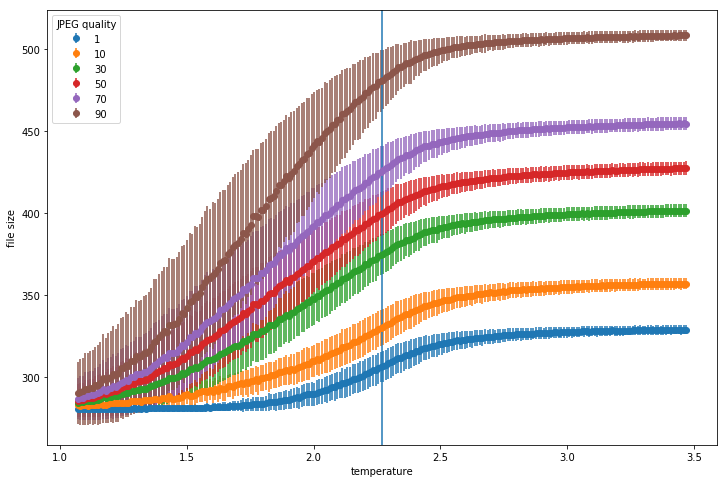

In [131]:
for q, s in zip(qualities, sizes):
    plt.errorbar(temps, s[:,0], yerr=s[:,1], fmt='o', label=q)
plt.axvline(2.269)
plt.legend(title='JPEG quality')
plt.ylabel("file size")
plt.xlabel("temperature")

Qualitatively no difference to previous results